In [8]:
import sqlite3 
import pandas as pd
#import pandas_profiling as pp
import numpy as np

In [9]:
conn = sqlite3.connect('traffic.db')

In [10]:
sql_master = """SELECT * FROM sqlite_master"""
pd.read_sql_query(sql_master, conn)

,type,name,tbl_name,rootpage,sql
0,table,traffic,traffic,2,"CREATE TABLE traffic(\n ""SeqID"" TEXT,\n ""Dat..."


In [13]:
sql_master = """SELECT sql FROM sqlite_master"""
pd.read_sql_query(sql_master, conn)

,sql
0,"CREATE TABLE traffic(\n ""SeqID"" TEXT,\n ""Dat..."


In [11]:
sql_all = "SELECT * FROM traffic"
all_df = pd.read_sql_query(sql_all, conn)

In [12]:
#pp.ProfileReport(all_df)

In [33]:
all_df.describe()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
count,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,...,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036
unique,867384,2710,1440,1,9,13987,210296,298798,339125,6,...,7940,69,71,19,749951,6,6,63,145,25
top,33c49de3-9e36-4f36-9326-b59a95e86fe8,03/17/2015,23:30:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WAYNE AVE @ DALE DR,0,0,No,...,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)",4,4,36,17,1
freq,59,1281,2312,1529036,375716,125683,2172,110485,110485,1482066,...,380216,1379705,1329309,1267088,110485,334292,334292,184196,131235,1161876


In [15]:
all_df['Violation Type'].value_counts()

Warning     760397
Citation    693505
ESERO        74235
SERO           899
Name: Violation Type, dtype: int64

In [16]:
grouped_race_violation = all_df.groupby(['Race', 'Violation Type']).size().astype(float)

In [34]:
all_df.groupby(['Race']).size()

Race
ASIAN               89675
BLACK              484206
HISPANIC           326826
NATIVE AMERICAN      3168
OTHER               83378
WHITE              541783
dtype: int64

In [17]:
all_df['Arrest Type'].value_counts()

A - Marked Patrol                         1267088
Q - Marked Laser                           139542
B - Unmarked Patrol                         48181
S - License Plate Recognition               14509
O - Foot Patrol                             14076
L - Motorcycle                              13031
E - Marked Stationary Radar                  9511
G - Marked Moving Radar (Stationary)         8210
R - Unmarked Laser                           6140
I - Marked Moving Radar (Moving)             2476
M - Marked (Off-Duty)                        2272
H - Unmarked Moving Radar (Stationary)       1115
F - Unmarked Stationary Radar                 837
J - Unmarked Moving Radar (Moving)            654
C - Marked VASCAR                             483
P - Mounted Patrol                            338
D - Unmarked VASCAR                           302
N - Unmarked (Off-Duty)                       216
K - Aircraft Assist                            55
Name: Arrest Type, dtype: int64

In [62]:
sum(grouped_race_violation['WHITE'])

541783.0

In [63]:
grouped_normalize = grouped_race_violation.copy()

for race in grouped_race_violation.index.levels[0]:
    race_viol = sum(grouped_race_violation[race])
    for viol in grouped_race_violation.index.levels[1]:
        try:
            grouped_normalize[race][viol] = grouped_race_violation[race][viol] / float(race_viol)
        except:
            pass

In [64]:
grouped_normalize

Race             Violation Type
ASIAN            Citation          0.377285
                 ESERO             0.051709
                 SERO              0.000379
                 Warning           0.570627
BLACK            Citation          0.466892
                 ESERO             0.047441
                 SERO              0.000529
                 Warning           0.485139
HISPANIC         Citation          0.518475
                 ESERO             0.062510
                 SERO              0.000826
                 Warning           0.418189
NATIVE AMERICAN  Citation          0.410354
                 ESERO             0.068182
                 Warning           0.521465
OTHER            Citation          0.388484
                 ESERO             0.045180
                 SERO              0.000516
                 Warning           0.565821
WHITE            Citation          0.425370
                 ESERO             0.041002
                 SERO              0.000546


In [19]:
all_df.groupby(['Race', 'Arrest Type']).size().astype(float)

Race   Arrest Type                           
ASIAN  A - Marked Patrol                          73514.0
       B - Unmarked Patrol                         2400.0
       C - Marked VASCAR                             41.0
       D - Unmarked VASCAR                           22.0
       E - Marked Stationary Radar                  731.0
       F - Unmarked Stationary Radar                 50.0
       G - Marked Moving Radar (Stationary)         543.0
       H - Unmarked Moving Radar (Stationary)        60.0
       I - Marked Moving Radar (Moving)             114.0
       J - Unmarked Moving Radar (Moving)            37.0
       K - Aircraft Assist                            1.0
       L - Motorcycle                               838.0
       M - Marked (Off-Duty)                        169.0
       N - Unmarked (Off-Duty)                        7.0
       O - Foot Patrol                              800.0
       P - Mounted Patrol                            24.0
       Q - Marked Laser   

In [20]:
all_df['Arrest Type'].value_counts(True)

A - Marked Patrol                         0.828684
Q - Marked Laser                          0.091261
B - Unmarked Patrol                       0.031511
S - License Plate Recognition             0.009489
O - Foot Patrol                           0.009206
L - Motorcycle                            0.008522
E - Marked Stationary Radar               0.006220
G - Marked Moving Radar (Stationary)      0.005369
R - Unmarked Laser                        0.004016
I - Marked Moving Radar (Moving)          0.001619
M - Marked (Off-Duty)                     0.001486
H - Unmarked Moving Radar (Stationary)    0.000729
F - Unmarked Stationary Radar             0.000547
J - Unmarked Moving Radar (Moving)        0.000428
C - Marked VASCAR                         0.000316
P - Mounted Patrol                        0.000221
D - Unmarked VASCAR                       0.000198
N - Unmarked (Off-Duty)                   0.000141
K - Aircraft Assist                       0.000036
Name: Arrest Type, dtype: float

In [21]:
len(all_df)

1529036

In [22]:
descrips = all_df.Description.value_counts()

In [23]:
descrips

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                              125683
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                       71761
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                                   48988
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND                39953
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                             37487
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                                36176
DRIVER FAILURE TO STOP AT STOP SIGN LINE                                                                 34753
PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE        30109
DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REGISTRATION PLATES AND VALIDATION TABS                       25113
E

In [24]:
np.percentile(descrips.values, 90, axis=0)

21.0

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
a = sorted(descrips.values)
cumsum_descrips = [sum(a[:i]) for i in range(len(a))]
cumsum_descrips

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


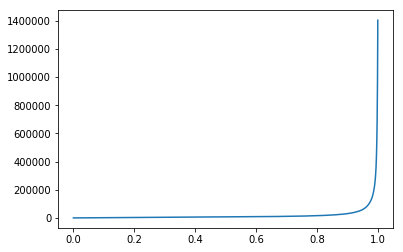

In [29]:
x_percentile = (np.array(range(len(a)))+1)/len(a)


plt.plot(x_percentile, cumsum_descrips)

In [30]:
all_df.Description.value_counts().index[1]

'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER'

In [31]:
viol_type = 'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER'

all_df[all_df['Description'].isin([viol_type])].groupby('Race').size()

Race
ASIAN               5100
BLACK              24133
HISPANIC           13885
NATIVE AMERICAN      141
OTHER               4031
WHITE              24471
dtype: int64

In [39]:
sql_all = '''
SELECT * FROM traffic
WHERE race = 'BLACK'
ORDER BY RANDOM() 
LIMIT 100
'''
df_black = pd.read_sql_query(sql_all, conn)
df_black.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
0,8a06ef2e-c446-44ae-917a-449743687a0c,02/26/2013,11:35:00,MCP,"4th District, Wheaton",PERSON DRIVING MOTOR VEHICLE WHILE LICENSE SUS...,KING WILLIAM DR / RT 97,39.1448122166667,-77.0672924833333,No,...,OLNEY,MD,MD,O - Foot Patrol,"(39.144812216667, -77.067292483333)",4,4,58,100,1
1,461af825-7800-46aa-a0f2-39aa85742884,02/09/2017,21:10:00,MCP,Headquarters and Special Operations,FAILURE OF LICENSEE TO NOTIFY ADMINISTRATION O...,SB GEORGIA AVE / WINDHAM LN,39.03064,-77.0480033333333,No,...,ROCKVILLE,MD,MD,B - Unmarked Patrol,"(39.03064, -77.048003333333)",4,4,16,17,1
2,5021d0b5-5a1e-4494-8294-966a702b46b0,07/29/2013,16:38:00,MCP,"3rd District, Silver Spring",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,DENNIS AVE/ TENBROOK DR,39.0236144,-77.0282858333333,No,...,WASHINGTON,DC,DC,Q - Marked Laser,"(39.0236144, -77.028285833333)",5,5,17,21,1
3,a7b12320-eed3-4d8a-a147-f5e8c819e30c,02/23/2015,17:25:00,MCP,"5th District, Germantown",STOP LIGHTS (*),SCENERY DR @ HALETHORPE LN,39.1842366666667,-77.263325,No,...,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.184236666667, -77.263325)",2,2,39,39,1
4,d86b817c-d18b-42c9-b9d5-d36118155264,07/10/2015,02:25:00,MCP,"3rd District, Silver Spring",DISPLAY SUSPENDED LIC.,COLUMBIA PIKE @ BURNT MILLS AVE,39.03765,-76.9989866666667,No,...,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.03765, -76.998986666667)",5,5,18,21,1


In [40]:
sql_all = '''
SELECT * FROM traffic
WHERE race = 'HISPANIC'
ORDER BY RANDOM() 
LIMIT 100
'''
df_hispanic = pd.read_sql_query(sql_all, conn)
df_hispanic.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
0,5cd9e80c-1e3b-4cd7-85c0-a74625eadb5e,12/07/2014,11:37:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,S/B GOSHEN @ EMORY GROVE,39.1582,-77.19213,No,...,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1582, -77.19213)",2,2,38,35,1
1,5b69bb0f-96e3-4df2-9744-9c4faa5b5360,07/18/2018,02:48:00,MCP,"4th District, Wheaton",UNSAFE BACKING OF MOTOR VEH.,2500 BLK ENNALLS AVE,39.0395916666667,-77.0534666666667,Yes,...,RIVERDALE,MD,MD,A - Marked Patrol,"(39.039591666667, -77.053466666667)",4,4,16,17,1
2,6f8296b2-c9ca-428f-b2f5-8dd815a7baa1,03/08/2017,17:16:00,MCP,"4th District, Wheaton",OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED...,CONNECTICUT AVE AND INDEPENDENCE AVE,39.0767225,-77.0806203333333,No,...,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0767225, -77.080620333333)",4,4,61,58,1
3,46bd234b-0921-4cb7-9283-b2d8f0ed7c1a,06/15/2013,23:08:00,MCP,"5th District, Germantown",FAILURE OF DRIVER INVOLVED IN ACCIDENT TO REND...,19515 FREDERICK ROAD,39.1730616666667,-77.2541816666667,3,...,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.173061666667, -77.254181666667)",2,2,39,39,1
4,32e6e02e-bbbb-4e2e-ba38-d812c05e2752,01/12/2017,12:33:00,MCP,"5th District, Germantown",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,RT 27 NB AT DAMASCUS HIGH SCHOOL,39.2843166666667,-77.209385,No,...,DAMASCUS,MD,MD,B - Unmarked Patrol,"(39.284316666667, -77.209385)",2,2,51,42,1
